# PROJECT 6 - STUDENT GRADES PREDICTION
# NAME - SUBHAM
# BATCH - DS2401

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.shape

(571, 43)

In [ ]:
# the dataset contains 571 rows and 43 columns

In [6]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [ ]:
# seat no. and all other columns representing the department and year of exam have object/string datatype
# and only CGPA column has float datatype as only this column has numerical values with decimals

In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [ ]:
# null values are present in a lot of columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [ ]:
# total rows are 571 and 43 columns
# non null are values which are not null values many columns don't have 571 non null meaning null values are present
# all columns are of object/string datatype and only CGPA column contains float datatype

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Seat No.
CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: count, Length: 571, dtype: int64


PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64


HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64


CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64


HS-105/12
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64


MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64


CS-

In [ ]:
# this represents value counts and unique values of each column
# length represents unique values and each unique values value counts number are besides them
# like for columnseat no. 571 unique values are present and unique value CS-97001 has appeared only 1 time in dataset

In [12]:
df.loc[df['CS-412']=='']


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


In [13]:
df.loc[df['CS-423']=='']

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


In [ ]:
# there are no columns having blank values
# let's deal with null values

In [80]:
df1=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df1

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [81]:
#changing string to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))
df1

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,567,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,568,3,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,569,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


In [37]:
df['CS-412']=df['CS-412'].fillna('A-')

In [42]:
df['CY-105']=df['CY-105'].fillna('A')
df['HS-105/12']=df['HS-105/12'].fillna('A')
df['MT-111']=df['MT-111'].fillna('A-')
df['CS-106']=df['CS-106'].fillna('A-')
df['EL-102']=df['EL-102'].fillna('A-')
df['EE-119']=df['EE-119'].fillna('A-')
df['ME-107']=df['ME-107'].fillna('A-')
df['CS-107']=df['CS-107'].fillna('A')
df['HS-205/20']=df['HS-205/20'].fillna('A-')
df['MT-222']=df['MT-222'].fillna('A-')
df['EE-222']=df['EE-222'].fillna('A')
df['MT-224']=df['MT-224'].fillna('A-')
df['CS-210']=df['CS-210'].fillna('A-')
df['CS-211']=df['CS-211'].fillna('A-')
df['CS-203']=df['CS-203'].fillna('A-')
df['CS-214']=df['CS-214'].fillna('C')
df['EE-217']=df['EE-217'].fillna('A-')
df['CS-212']=df['CS-212'].fillna('A-')
df['CS-215']=df['CS-215'].fillna('A-')
df['MT-331']=df['MT-331'].fillna('A')
df['EF-303']=df['EF-303'].fillna('B')
df['HS-304']=df['HS-304'].fillna('A-')
df['CS-301']=df['CS-301'].fillna('A-')
df['CS-302']=df['CS-302'].fillna('A-')
df['TC-383']=df['TC-383'].fillna('A')
df['MT-442']=df['MT-442'].fillna('A-')
df['EL-332']=df['EL-332'].fillna('A-')
df['CS-318']=df['CS-318'].fillna('A-')
df['CS-306']=df['CS-306'].fillna('A-')
df['CS-312']=df['CS-312'].fillna('A+')
df['CS-317']=df['CS-317'].fillna('B-')
df['CS-403']=df['CS-403'].fillna('A')
df['CS-421']=df['CS-421'].fillna('B')
df['CS-406']=df['CS-406'].fillna('A-')
df['CS-414']=df['CS-414'].fillna('A')
df['CS-419']=df['CS-419'].fillna('A-')
df['CS-423']=df['CS-423'].fillna('A-')

In [38]:
df['CS-412'].isnull().sum()

0

In [39]:
df['CS-412']

0      A-
1       B
2       A
3      C+
4       A
       ..
566     A
567    A-
568    A-
569     C
570    C-
Name: CS-412, Length: 571, dtype: object

In [40]:
df['CS-412'].value_counts()

CS-412
A-    236
B+     80
A      77
B      65
B-     37
C+     24
C      19
D+      8
C-      7
F       6
D       5
A+      4
W       3
Name: count, dtype: int64

In [43]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [ ]:
# null values have been replaced by mode of each column

In [82]:
df1.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [ ]:
# df1 is data with label encoding having categorical values changed to numerical values. label encoder removed null values as 
# well by assigning it numerical values
# df is data without label encoding

In [83]:
for i in df1.columns:
    print(df1[i].value_counts())
    print('\n')

Seat No.
0      1
383    1
377    1
378    1
379    1
      ..
184    1
183    1
182    1
181    1
570    1
Name: count, Length: 571, dtype: int64


PH-121
2     112
0     111
4      61
3      57
5      56
9      44
6      33
7      31
10     22
1      22
8      19
12      2
11      1
Name: count, dtype: int64


HS-101
2     82
5     78
6     68
3     63
4     59
8     50
7     47
9     45
0     38
10    36
1      4
11     1
Name: count, dtype: int64


CY-105
0     177
2     120
4      50
3      49
5      42
9      31
1      31
6      19
7      17
8      16
10     14
12      3
13      1
11      1
Name: count, dtype: int64


HS-105/12
0     96
2     75
4     70
3     57
9     45
6     41
5     40
7     39
8     36
10    34
1     34
12     2
13     1
11     1
Name: count, dtype: int64


MT-111
2     105
0     100
5      70
4      62
3      55
8      39
7      33
6      30
9      26
1      23
10     21
12      3
13      2
11      2
Name: count, dtype: int64


CS-105
0     151
2     134
4 

# DESCRIPTION OF DATASET

In [44]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [ ]:
# df dataset doesn't have numerical values so it inly shows for CGPA column

In [84]:
df1.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,285.000000,3.781086,5.071804,2.921191,4.264448,3.935201,2.838879,4.161121,3.998249,3.921191,...,4.299475,4.982487,3.663748,5.595447,4.770578,2.693520,4.084063,4.211909,4.570928,2.954888
std,164.977776,3.046895,2.785317,2.992228,3.216478,3.034481,2.696709,2.774311,3.075939,2.698100,...,3.580108,2.927134,3.128656,2.916243,4.565881,2.931189,2.656988,3.040475,4.085464,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,142.500000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,285.000000,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,427.500000,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,570.000000,12.000000,11.000000,13.000000,13.000000,13.000000,10.000000,13.000000,13.000000,12.000000,...,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


In [ ]:
# df1 shows all columns for describe function
# 1) all columns have 571 rows meaning there are nonull values present
# 2)some skewness is present, right skewed columns are PH-121,HS-101,CY-105,HS-105/12,CS-105,CS-106 etc
#   left skewed columns are MT-111,EL-102, CS-317 etc some columns have less skewness than others
# 3) outliers maybe present in some columns like PH-121,HS-101,CY-105,HS-105/12,MT-111 etc

<Axes: >

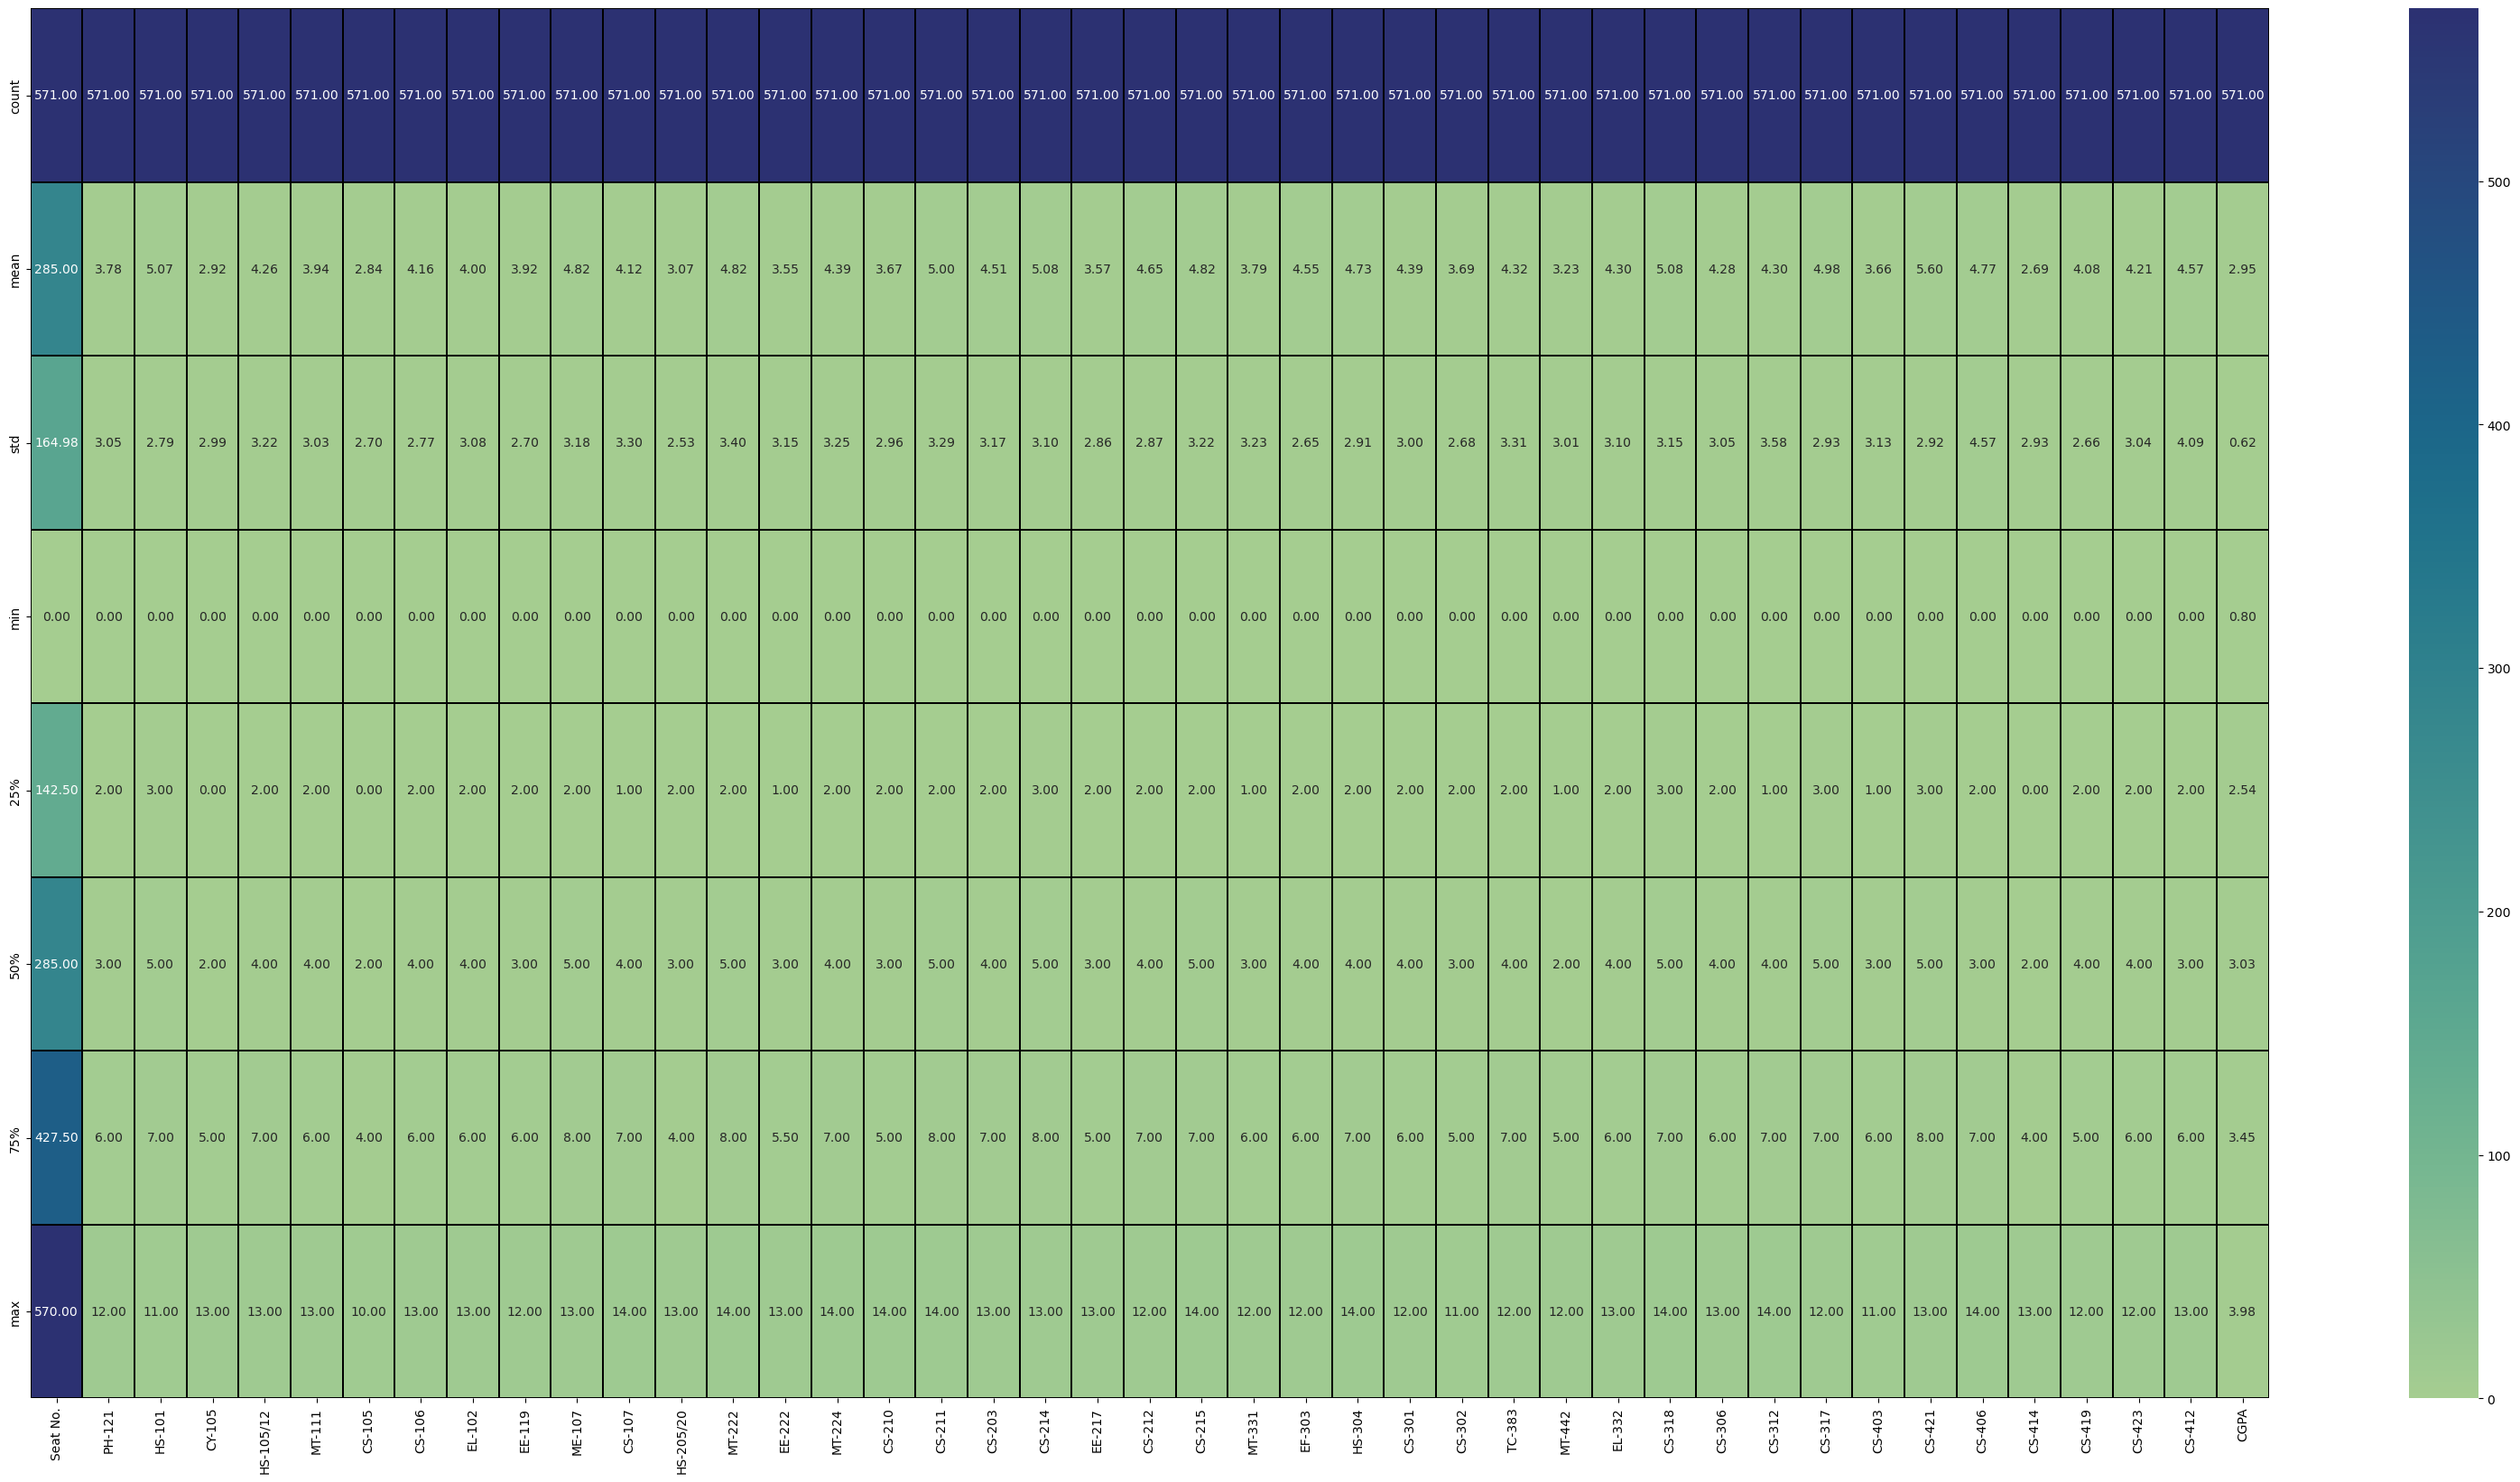

In [59]:
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(df1.describe(),annot=True ,fmt='0.2f' ,linewidth=0.2,linecolor='black',cmap='crest' )

In [ ]:
# same statistical summary can also be seen through heatmap

# CHECKING SKEWNESS

In [60]:
a=df.columns
a

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

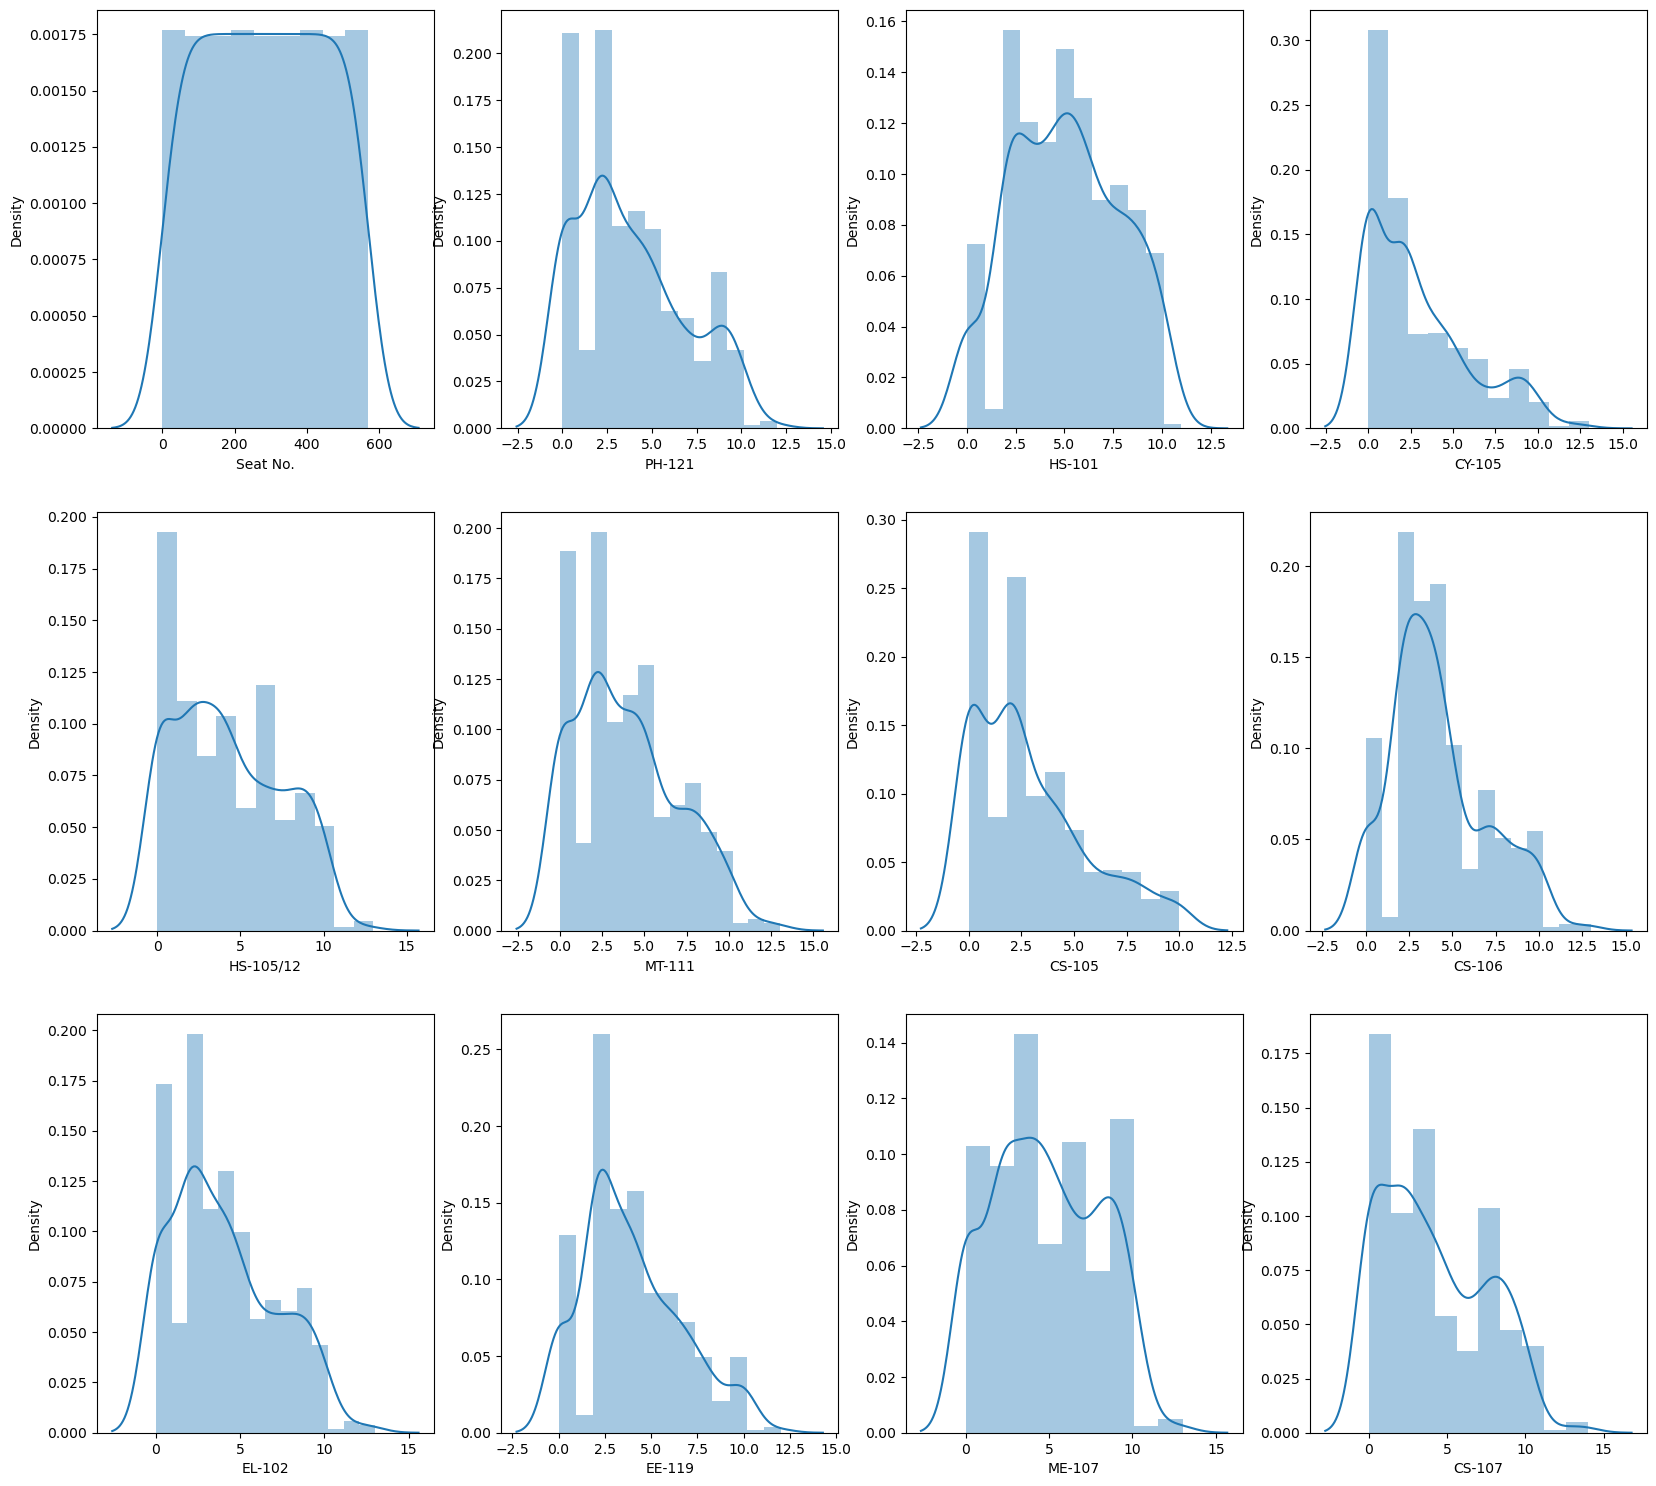

In [62]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in a:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.distplot(df1[i])
    p+=1


In [ ]:
# we can see that skewness is present in these columns through figure as well

In [85]:
#we can check numerical value of skewness too
# acceptable range of skewness is +0.5 to -0.5
df1.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       1.001752
HS-105/12    0.337649
MT-111       0.520916
CS-105       0.930769
CS-106       0.682923
EL-102       0.532311
EE-119       0.607213
ME-107       0.131791
CS-107       0.456184
HS-205/20    1.155648
MT-222       0.267531
EE-222       0.864582
MT-224       0.566537
CS-210       0.966469
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217       0.876835
CS-212       0.459739
CS-215       0.288215
MT-331       0.674150
EF-303       0.547945
HS-304       0.814333
CS-301       0.489045
CS-302       0.697409
TC-383       0.379712
MT-442       0.970582
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403       0.638689
CS-421       0.317459
CS-406       1.105583
CS-414       1.592209
CS-419       0.773674
CS-423       0.627219
CS-412       1.086028
CGPA        -0.497203
dtype: float64

In [86]:
#removing skewness using cuberoot method
df1['CY-105']=np.cbrt(df1['CY-105'])
df1['CS-105']=np.cbrt(df1['CS-105'])
df1['CS-106']=np.cbrt(df1['CS-106'])
df1['EE-119']=np.cbrt(df1['EE-119'])
df1['HS-205/20']=np.cbrt(df1['HS-205/20'])
df1['EE-222']=np.cbrt(df1['EE-222'])
df1['CS-210']=np.cbrt(df1['CS-210'])
df1['EE-217']=np.cbrt(df1['EE-217'])
df1['MT-331']=np.cbrt(df1['MT-331'])
df1['HS-304']=np.cbrt(df1['HS-304'])
df1['CS-302']=np.cbrt(df1['CS-302'])
df1['MT-442']=np.cbrt(df1['MT-442'])
df1['CS-403']=np.cbrt(df1['CS-403'])
df1['CS-406']=np.cbrt(df1['CS-406'])
df1['CS-414']=np.cbrt(df1['CS-414'])
df1['CS-419']=np.cbrt(df1['CS-419'])
df1['CS-423']=np.cbrt(df1['CS-423'])
df1['CS-412']=np.cbrt(df1['CS-412'])

In [87]:
df1.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105      -0.397919
HS-105/12    0.337649
MT-111       0.520916
CS-105      -0.580120
CS-106      -1.488958
EL-102       0.532311
EE-119      -1.381081
ME-107       0.131791
CS-107       0.456184
HS-205/20   -0.958609
MT-222       0.267531
EE-222      -0.758793
MT-224       0.566537
CS-210      -1.007260
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217      -1.018303
CS-212       0.459739
CS-215       0.288215
MT-331      -0.813649
EF-303       0.547945
HS-304      -1.565512
CS-301       0.489045
CS-302      -1.235617
TC-383       0.379712
MT-442      -0.672029
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403      -0.772722
CS-421       0.317459
CS-406      -0.671251
CS-414      -0.382579
CS-419      -1.561599
CS-423      -1.250860
CS-412      -0.841460
CGPA        -0.497203
dtype: float64

In [ ]:
#  for removal of skewness there are various method like log transform, cuberoot, boxcox etc
# we are using the cuberoot method
# after removal of skewness we check skewness and get that there is still a little skewness is present in some columns but other
# methods are also having the same problem so i'm only using cuberoot here

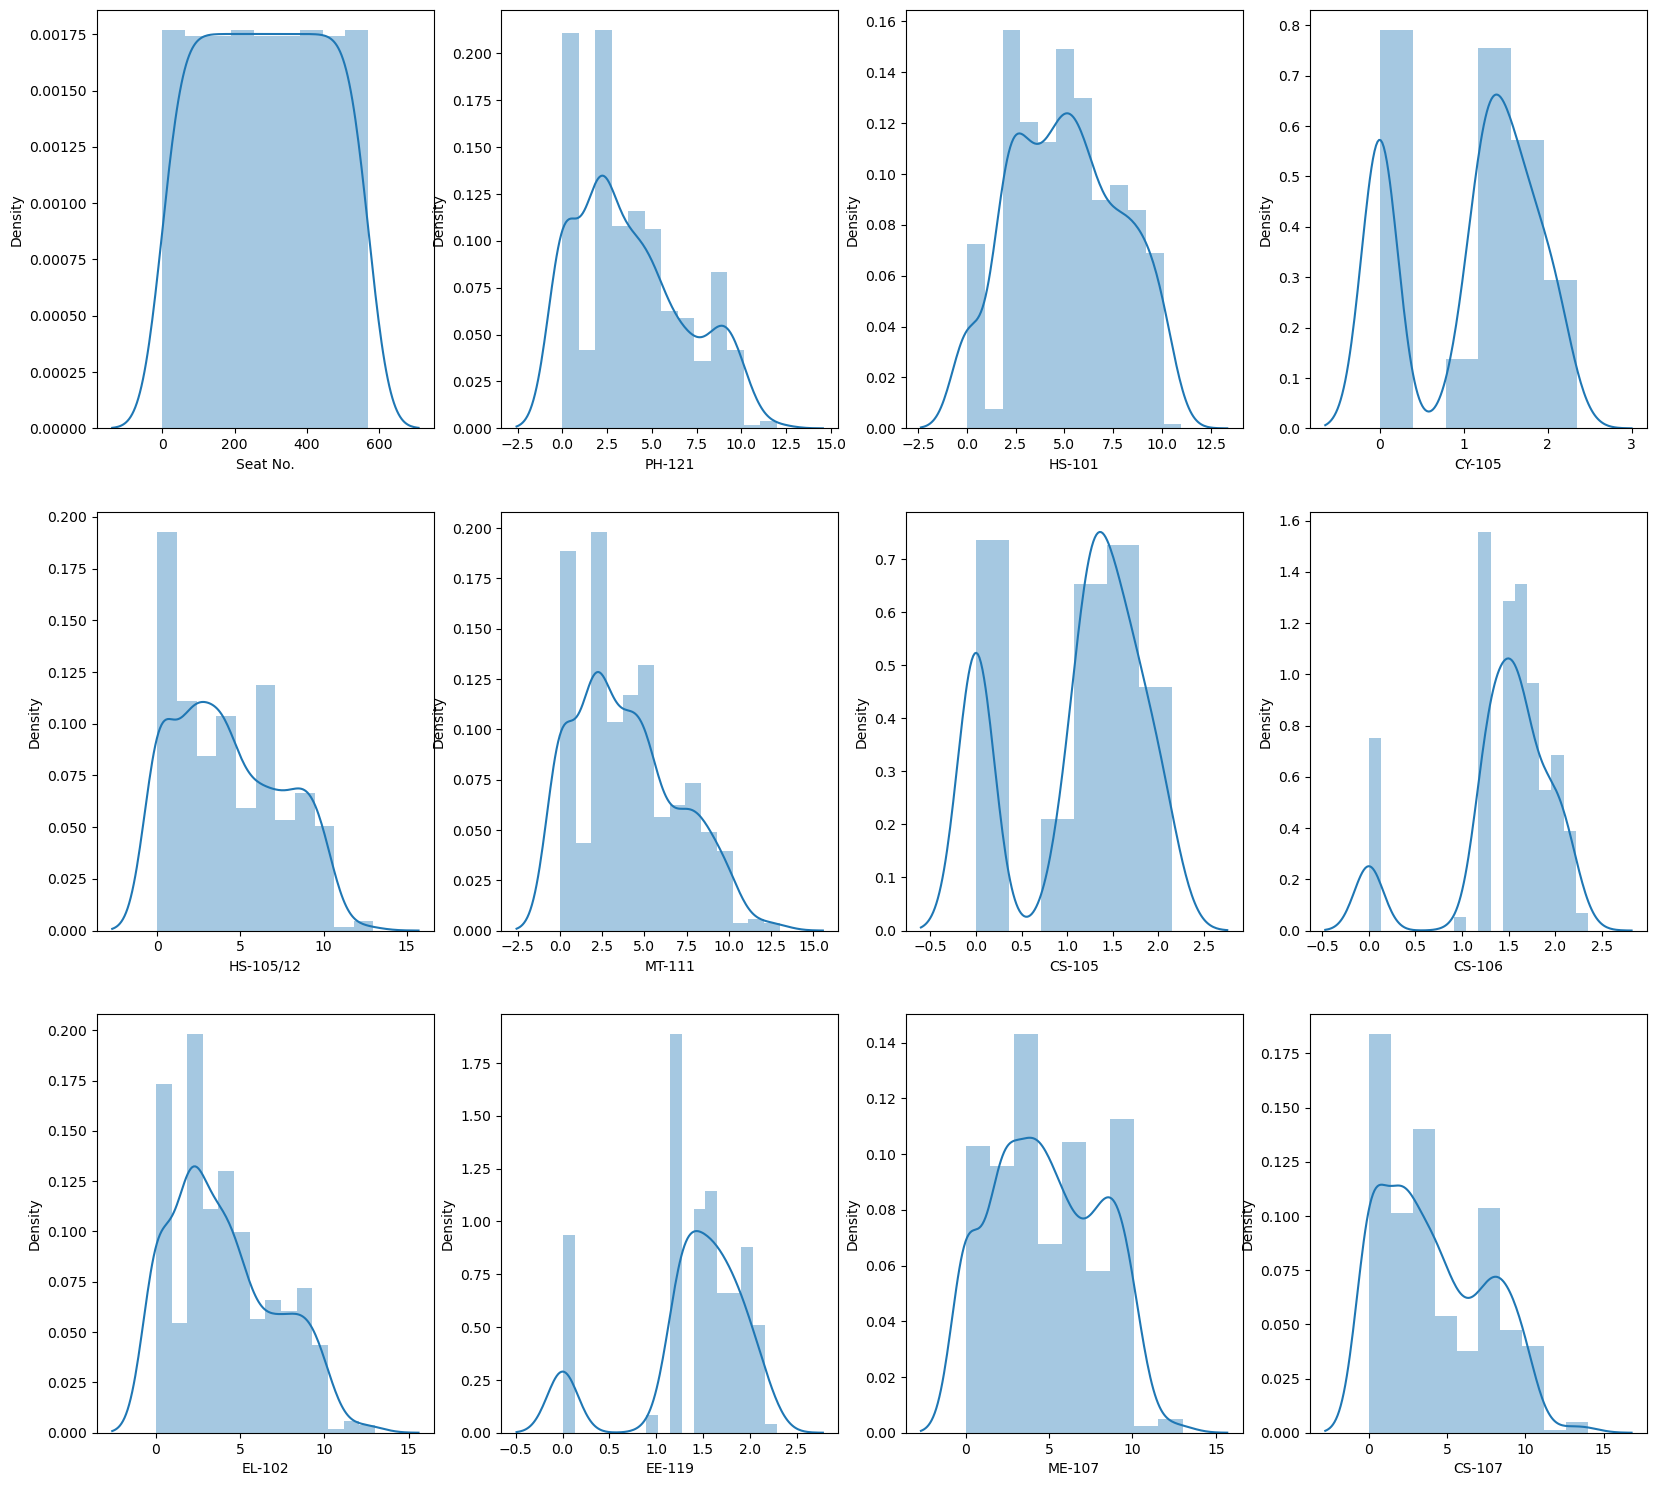

In [70]:
plt.figure(figsize=(20,25))
p=1
for i in a:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.distplot(df1[i])
    p+=1


In [ ]:
# we can see that skewness is reduced a little 
# i'm only using 12 plots as this method only supports 16 plots and we have 43 columns so it's better to look at a few columns

# CHECKING FOR OUTLIERS

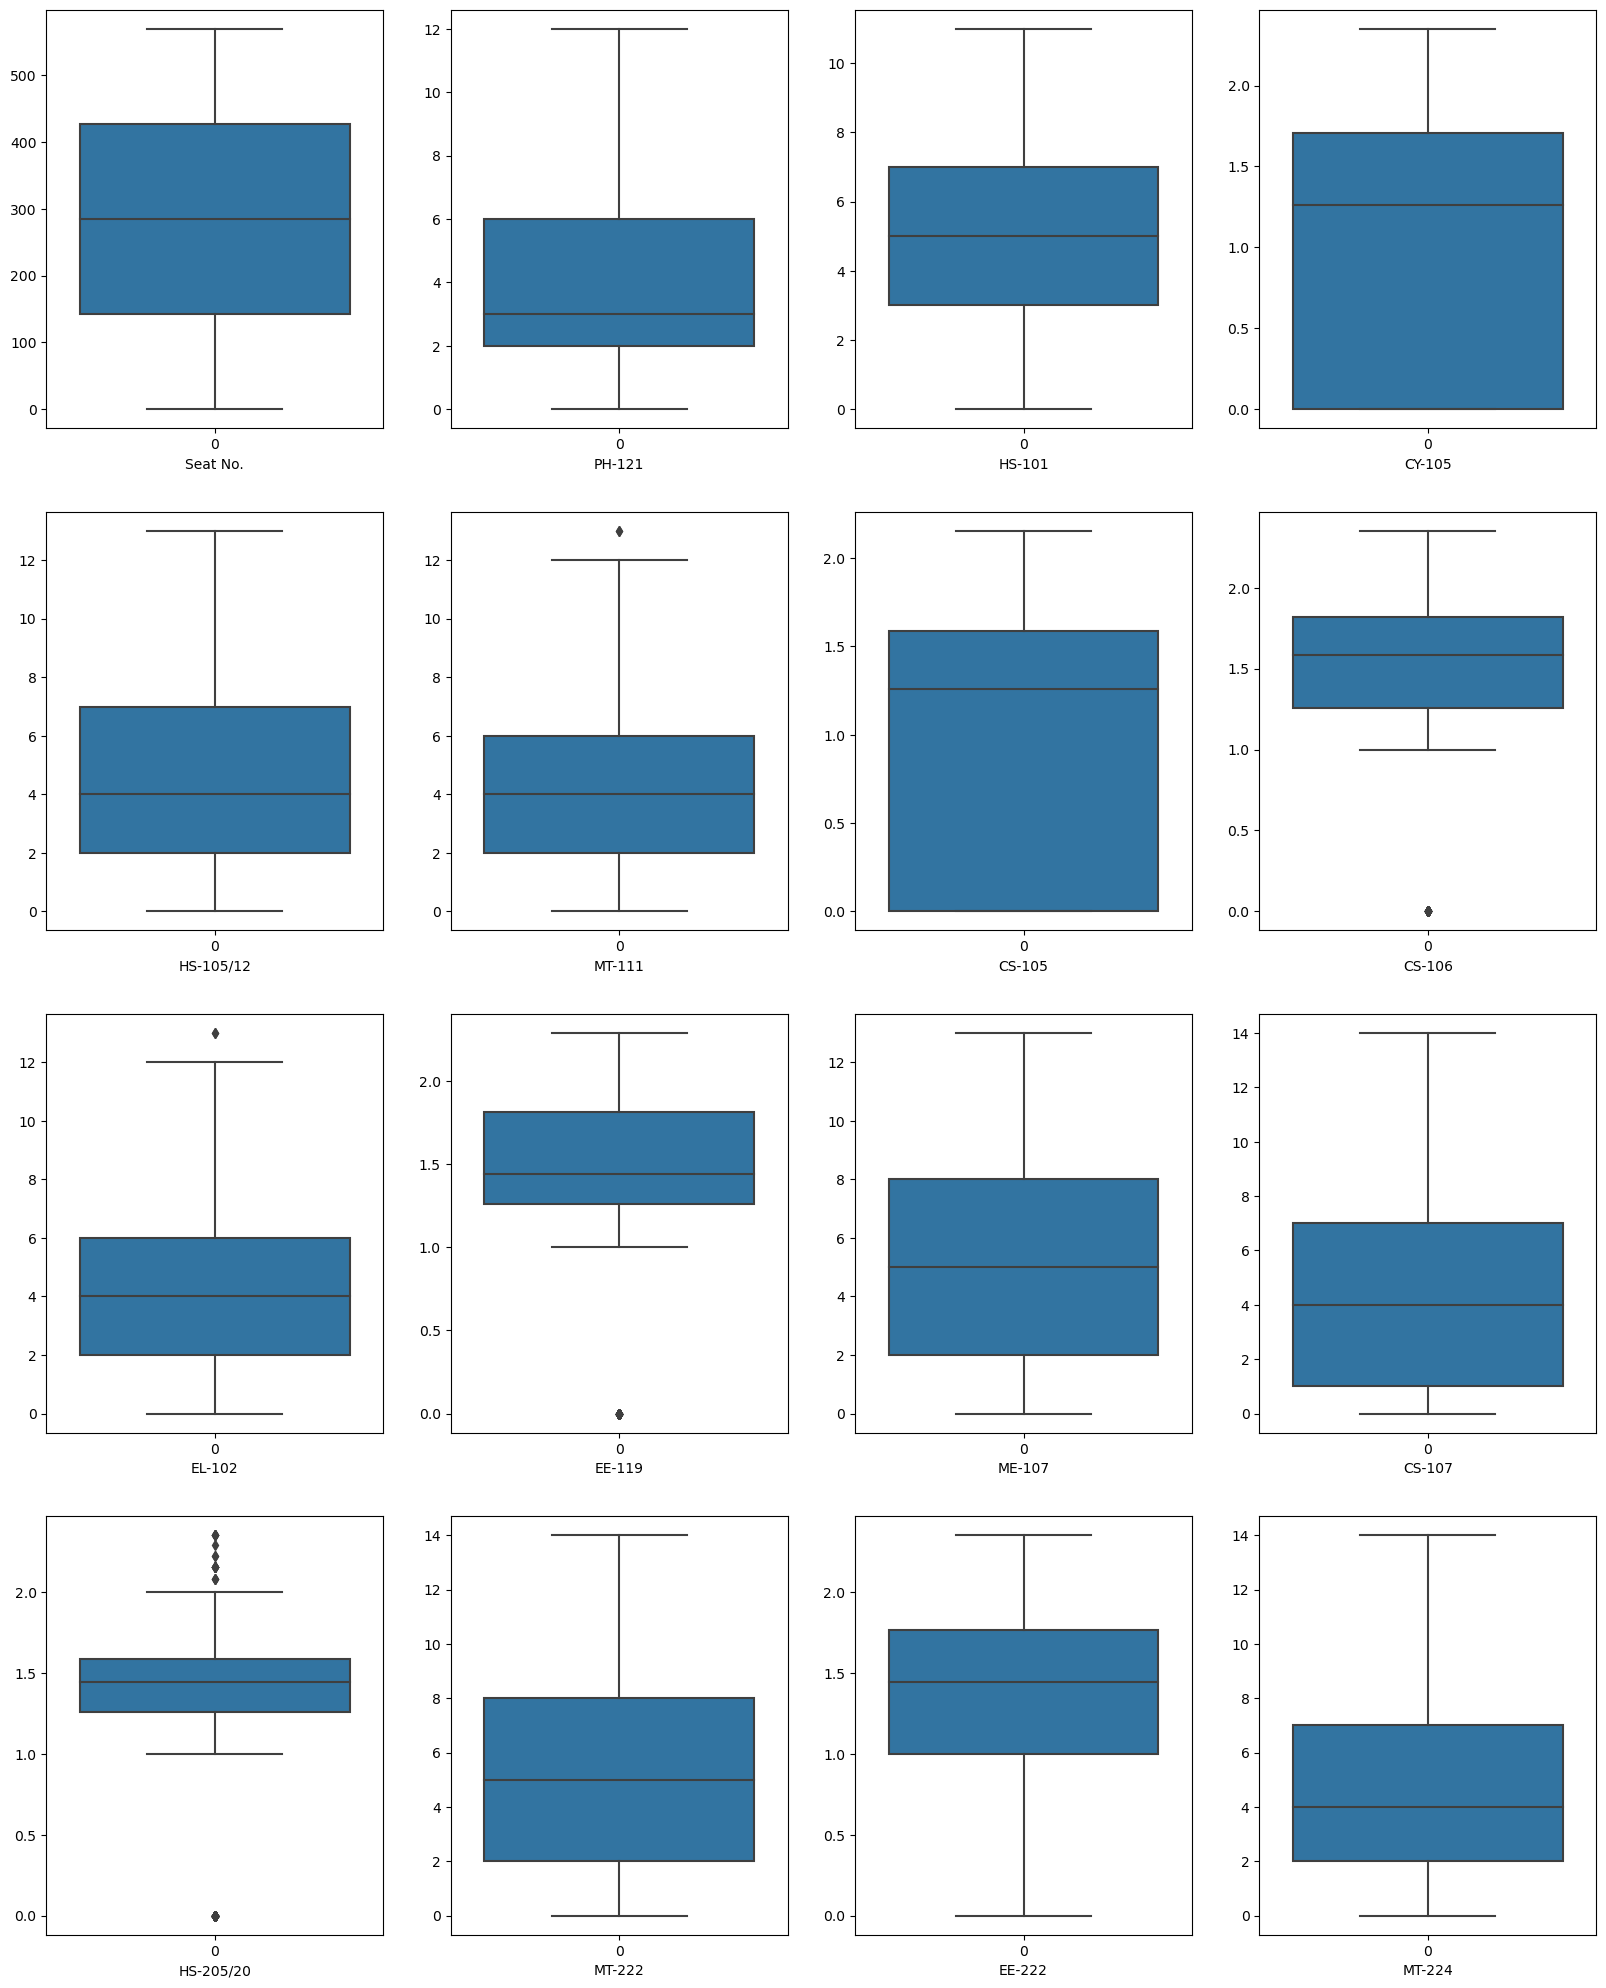

In [73]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in a:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df1[i])
        plt.xlabel(i)
    p+=1


In [ ]:
# we can see through these boxplots that there are some outliers present in some columns like HS-205/20,EE-119,EL-102,MT-111
# CS-106

In [74]:
#removing outliers
from scipy.stats import zscore
df1.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [88]:
c=df1[['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA']]
z=np.abs(zscore(c))
z

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,1.729020,0.400402,1.770900,1.215446,0.540054,1.340711,1.464099,1.129927,1.302126,0.526063,...,1.034541,1.031780,1.019472,0.825261,0.237720,1.397465,1.009284,0.043368,0.246191,1.209480
1,1.722953,1.242052,1.411559,1.416605,1.473569,0.351207,0.993577,1.129927,1.300986,1.287708,...,1.593674,1.373711,0.772761,1.168469,0.237720,0.900841,0.674365,0.636707,0.025209,1.527217
2,1.716887,1.242052,0.744483,1.389651,0.228883,0.021373,1.541138,0.461818,0.000570,0.245171,...,0.363289,0.677873,1.678598,0.138846,2.036931,1.397465,2.653450,0.245218,2.121612,1.053392
3,1.710820,1.714365,0.692879,1.416605,1.473569,1.670546,0.216335,1.264144,1.302126,1.160297,...,1.593674,0.347919,1.227810,0.825261,0.404974,0.541002,0.849829,0.788355,0.725829,1.691731
4,1.704753,0.585070,1.103823,0.251457,0.082289,1.297966,1.541138,0.350611,0.000570,2.404228,...,0.195843,0.335942,0.462861,0.204362,0.237720,1.397465,0.346072,0.245218,2.121612,0.795331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,1.704753,0.256579,1.822504,1.389651,0.704632,0.968131,1.541138,0.350611,0.650208,0.690583,...,0.642855,1.019804,1.678598,1.920400,2.036931,0.736094,0.253664,0.043368,2.121612,1.359839
567,1.710820,0.913561,1.822504,1.389651,1.326975,1.297966,1.541138,2.624989,0.650208,2.404228,...,0.083723,0.335942,1.678598,1.920400,0.237720,0.541002,0.346072,0.636707,0.246191,1.317904
568,1.716887,0.256579,1.822504,0.251457,0.082289,1.297966,1.541138,2.624989,1.300986,2.404228,...,0.642855,0.677873,1.678598,0.547570,2.036931,1.044850,0.253664,0.245218,0.246191,0.830814
569,1.722953,1.242052,0.385142,1.319759,1.326975,1.670546,1.464099,0.461818,1.302126,0.526063,...,1.314107,0.677873,0.267047,0.825261,0.933500,1.044850,0.012162,0.467121,0.583213,1.228834


In [89]:
# above table shows z score of all columns 
# z score less than 3 contains 99.7% data
#threshold=3
np.where(z>3)
#z score greater than 3 meaning outliers
# these values represent outliers

(array([  2,  48,  82,  98, 107, 110, 143, 232, 260, 281, 286, 287, 288,
        289, 305, 336, 347, 350, 359, 362, 366, 427, 449, 457, 459, 472,
        498, 529, 540, 552, 565, 567], dtype=int64),
 array([25, 25, 25, 25, 25, 25, 42, 25, 25, 42, 25, 25, 42, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 42, 25],
       dtype=int64))

In [ ]:
# first array is of row and second array is of column meaning 2nd row of 25th column has an outlier value. 

In [90]:
df2=z[(z<3).all(axis=1)]
df2
# we will select/choose only that data having z score less than 3 thus removing outlier values

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,1.729020,0.400402,1.770900,1.215446,0.540054,1.340711,1.464099,1.129927,1.302126,0.526063,...,1.034541,1.031780,1.019472,0.825261,0.237720,1.397465,1.009284,0.043368,0.246191,1.209480
1,1.722953,1.242052,1.411559,1.416605,1.473569,0.351207,0.993577,1.129927,1.300986,1.287708,...,1.593674,1.373711,0.772761,1.168469,0.237720,0.900841,0.674365,0.636707,0.025209,1.527217
3,1.710820,1.714365,0.692879,1.416605,1.473569,1.670546,0.216335,1.264144,1.302126,1.160297,...,1.593674,0.347919,1.227810,0.825261,0.404974,0.541002,0.849829,0.788355,0.725829,1.691731
4,1.704753,0.585070,1.103823,0.251457,0.082289,1.297966,1.541138,0.350611,0.000570,2.404228,...,0.195843,0.335942,0.462861,0.204362,0.237720,1.397465,0.346072,0.245218,2.121612,0.795331
5,1.698686,1.242052,0.025802,0.488949,1.784741,1.010877,0.216335,0.828187,0.324819,0.316014,...,0.475409,0.005988,0.902013,0.482054,0.237720,0.295942,0.253664,0.467121,0.025209,0.114695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.692620,0.585070,1.411559,1.389651,0.540054,0.021373,0.673140,0.655233,0.650208,0.526063,...,0.363289,0.689850,0.462861,1.511677,0.557980,1.290650,0.012162,0.636707,0.423726,0.561102
566,1.704753,0.256579,1.822504,1.389651,0.704632,0.968131,1.541138,0.350611,0.650208,0.690583,...,0.642855,1.019804,1.678598,1.920400,2.036931,0.736094,0.253664,0.043368,2.121612,1.359839
568,1.716887,0.256579,1.822504,0.251457,0.082289,1.297966,1.541138,2.624989,1.300986,2.404228,...,0.642855,0.677873,1.678598,0.547570,2.036931,1.044850,0.253664,0.245218,0.246191,0.830814
569,1.722953,1.242052,0.385142,1.319759,1.326975,1.670546,1.464099,0.461818,1.302126,0.526063,...,1.314107,0.677873,0.267047,0.825261,0.933500,1.044850,0.012162,0.467121,0.583213,1.228834


In [91]:
df1.shape
# old dataset

(571, 43)

In [92]:
df2.shape
# new dataset

(539, 43)

In [ ]:
# 32 rows were removed having outliers

In [93]:
#this is percentage loss of data. max data that we can afford to lose is 10%
# since our value is 5.604% we lose 5.604% data which is within 10% range
#we cannot lose too much data as some data might be essential for model building
(df1.shape[0]-df2.shape[0])/(df1.shape[0])*100

5.604203152364273

# CHECK FOR CORRELATION AND MULTICOLLINEARITY

In [94]:
df1.corr()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,1.000000,0.068592,-0.044036,-0.347813,-0.270623,-0.196181,-0.045240,-0.169443,-0.032695,-0.001842,...,-0.456191,-0.072117,-0.449730,-0.234102,0.290451,0.387323,-0.120465,-0.071669,0.337217,0.054342
PH-121,0.068592,1.000000,0.382436,0.494438,0.508231,0.487830,0.512164,0.322415,0.443420,0.475628,...,0.140798,0.499998,0.344098,0.383521,0.407603,0.196648,0.483989,0.111669,0.540326,-0.663135
HS-101,-0.044036,0.382436,1.000000,0.277985,0.473146,0.441847,0.319041,0.279827,0.359801,0.330946,...,0.244502,0.369839,0.233261,0.336850,0.154484,0.220369,0.322764,0.257989,0.249439,-0.537170
CY-105,-0.347813,0.494438,0.277985,1.000000,0.457361,0.480726,0.476954,0.285775,0.362407,0.423064,...,0.370482,0.478931,0.500630,0.440911,0.159530,0.020868,0.415448,0.166644,0.250467,-0.582870
HS-105/12,-0.270623,0.508231,0.473146,0.457361,1.000000,0.505049,0.451935,0.423601,0.373136,0.355706,...,0.337579,0.514041,0.448576,0.484061,0.172586,0.215048,0.437828,0.260084,0.263011,-0.627644
MT-111,-0.196181,0.487830,0.441847,0.480726,0.505049,1.000000,0.360652,0.433160,0.568940,0.388671,...,0.534544,0.581354,0.444224,0.577514,0.200745,0.291501,0.471837,0.451421,0.287390,-0.756109
CS-105,-0.045240,0.512164,0.319041,0.476954,0.451935,0.360652,1.000000,0.271307,0.294002,0.365447,...,0.134498,0.354495,0.296903,0.262734,0.288234,0.089284,0.320160,0.052333,0.309242,-0.514265
CS-106,-0.169443,0.322415,0.279827,0.285775,0.423601,0.433160,0.271307,1.000000,0.296782,0.328157,...,0.367121,0.393004,0.364597,0.392434,0.156190,0.147259,0.395819,0.221941,0.257702,-0.485545
EL-102,-0.032695,0.443420,0.359801,0.362407,0.373136,0.568940,0.294002,0.296782,1.000000,0.422894,...,0.396578,0.515770,0.298588,0.461098,0.187955,0.321454,0.386305,0.428484,0.306085,-0.669536
EE-119,-0.001842,0.475628,0.330946,0.423064,0.355706,0.388671,0.365447,0.328157,0.422894,1.000000,...,0.260911,0.435433,0.389165,0.406499,0.295401,0.143834,0.457368,0.260803,0.434105,-0.592748


<Axes: >

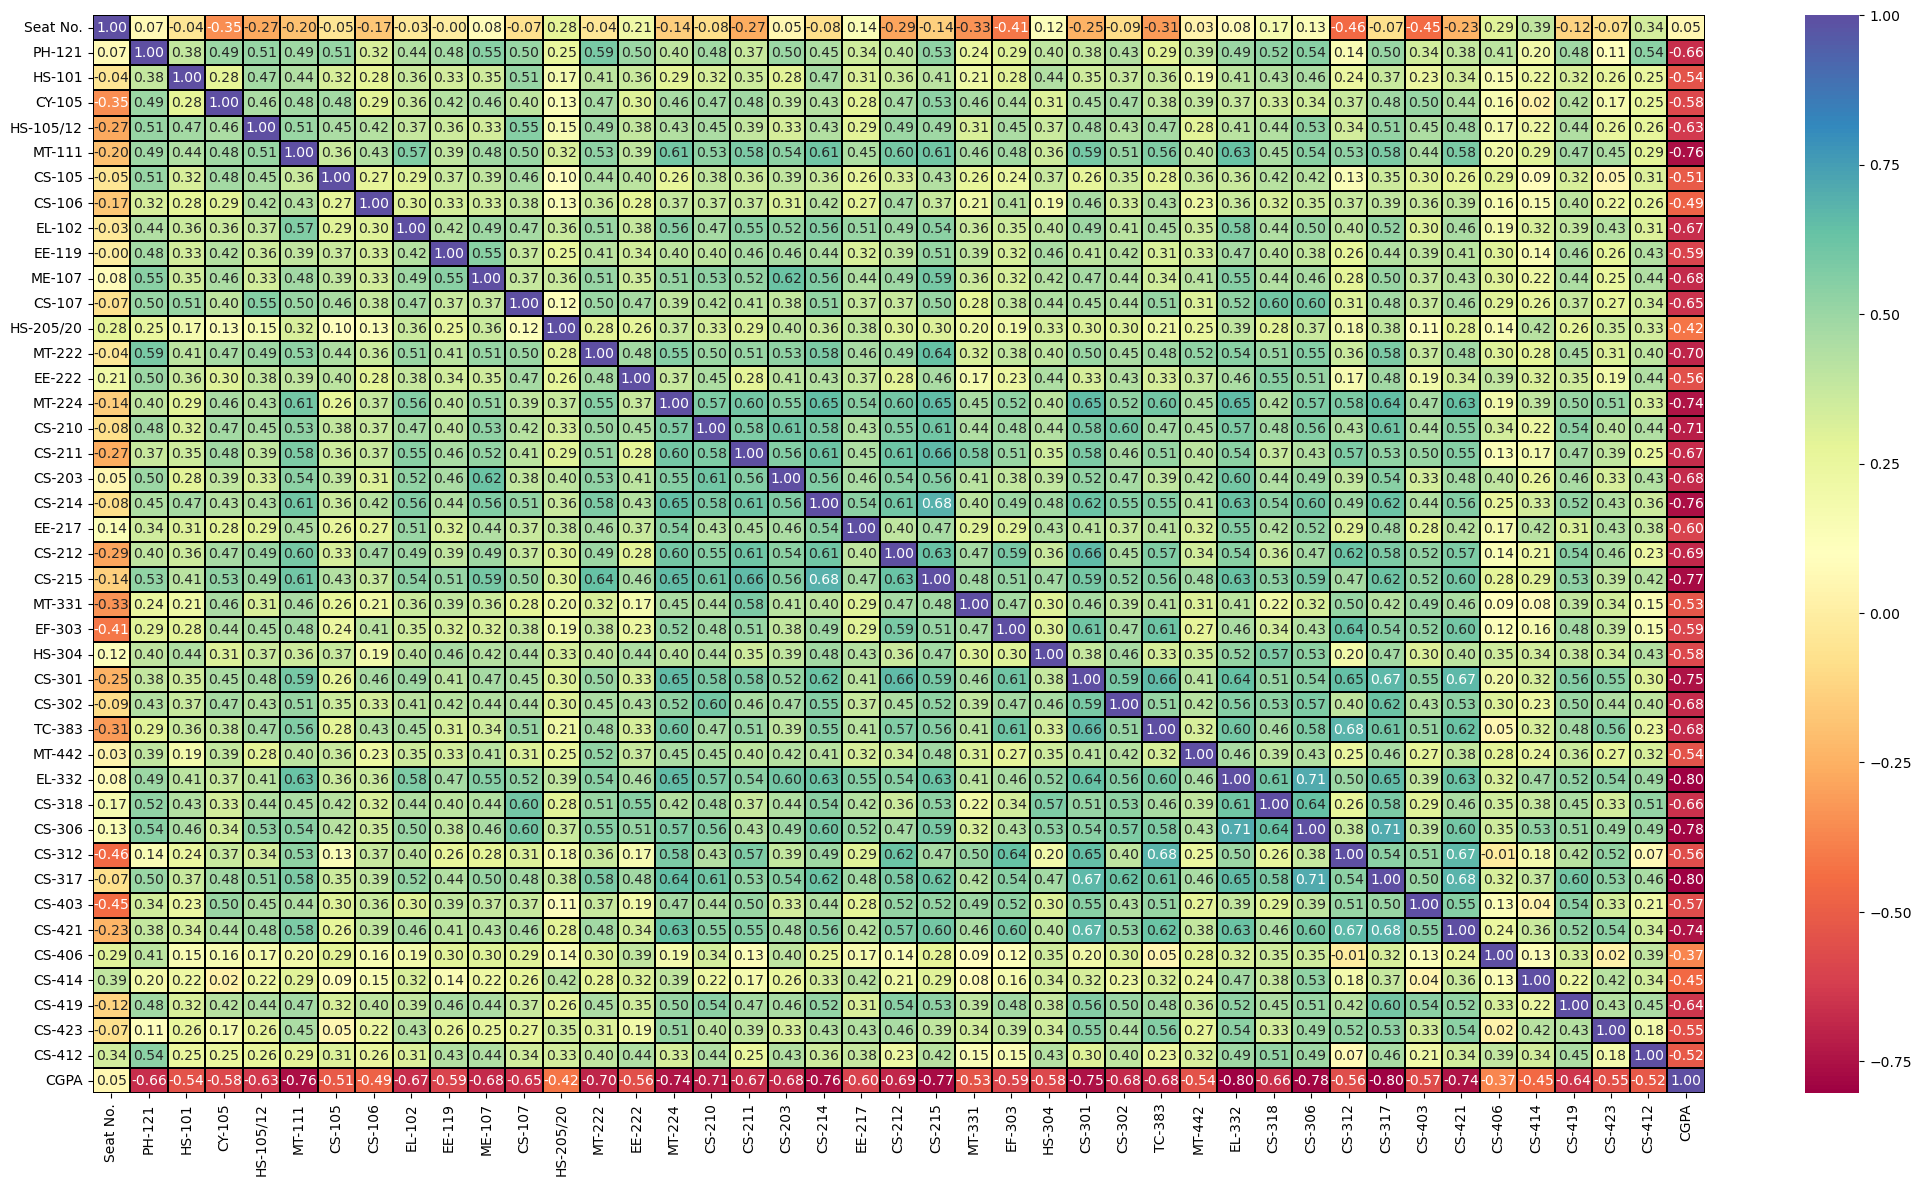

In [95]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for old dataset

In [96]:
df2.corr()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,1.000000,-0.152919,-0.042882,0.182669,0.083524,0.049420,0.014110,0.190874,0.001223,0.080306,...,-0.055539,-0.059372,0.118280,0.050488,0.043686,0.079634,0.021891,-0.118526,-0.034661,-0.005220
PH-121,-0.152919,1.000000,0.117933,0.101780,0.209368,0.243784,0.122295,0.012590,0.159927,0.130096,...,0.158803,0.190438,0.018609,0.136767,0.067489,0.046725,0.192197,0.050514,0.211034,0.413033
HS-101,-0.042882,0.117933,1.000000,0.056367,0.085594,0.148603,0.087671,-0.009325,0.078605,0.078158,...,0.000146,0.132335,0.107304,0.130386,0.018505,-0.003920,0.114775,0.065687,0.061550,0.287527
CY-105,0.182669,0.101780,0.056367,1.000000,0.088090,0.125691,0.109930,0.005714,0.084189,0.143846,...,0.085849,0.078669,0.096101,0.099496,-0.054156,0.042971,0.063905,-0.000370,0.001819,0.166730
HS-105/12,0.083524,0.209368,0.085594,0.088090,1.000000,0.133373,-0.008295,0.193033,0.091992,-0.024447,...,0.125950,0.148018,0.141333,0.130919,-0.020390,-0.031331,0.168520,-0.026976,-0.041268,0.230417
MT-111,0.049420,0.243784,0.148603,0.125691,0.133373,1.000000,-0.017517,0.134248,0.235405,0.079457,...,0.274049,0.232570,0.142771,0.227387,0.088324,0.040280,0.195076,0.148230,0.061512,0.467895
CS-105,0.014110,0.122295,0.087671,0.109930,-0.008295,-0.017517,1.000000,-0.059502,-0.007375,0.067418,...,0.074787,0.066035,0.024613,0.015093,-0.053382,-0.020277,0.042072,0.019149,-0.023076,0.132399
CS-106,0.190874,0.012590,-0.009325,0.005714,0.193033,0.134248,-0.059502,1.000000,0.062136,0.111768,...,-0.000948,0.089296,0.116477,0.085967,0.051072,0.013923,0.165626,-0.049241,0.017140,0.187465
EL-102,0.001223,0.159927,0.078605,0.084189,0.091992,0.235405,-0.007375,0.062136,1.000000,0.075933,...,0.129814,0.137186,0.035381,0.156577,0.020339,0.032039,0.090887,0.105452,0.086164,0.313224
EE-119,0.080306,0.130096,0.078158,0.143846,-0.024447,0.079457,0.067418,0.111768,0.075933,1.000000,...,0.048136,0.058651,0.068374,0.141142,0.060102,-0.062455,0.193563,0.077383,0.192101,0.230849


<Axes: >

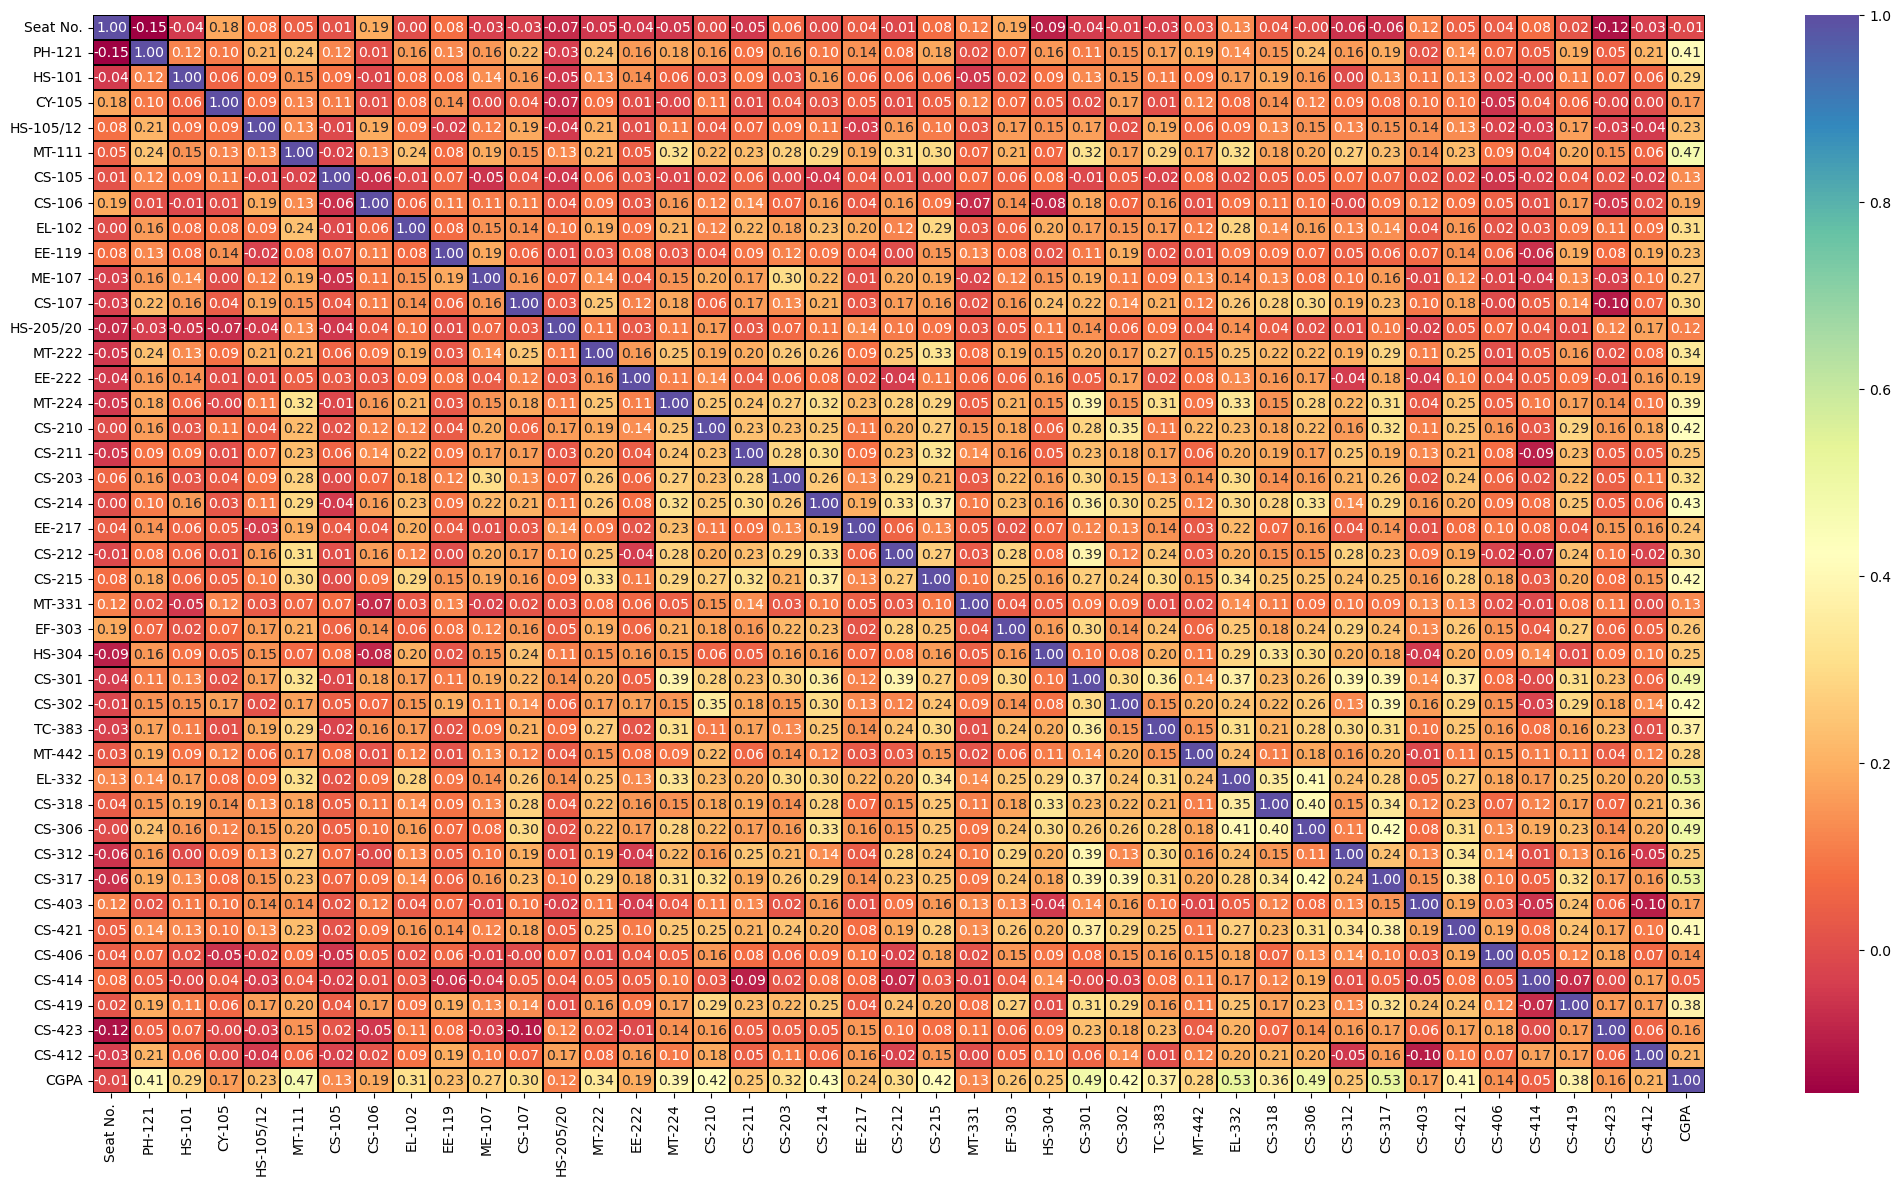

In [97]:
plt.figure(figsize=(26,14))
sns.heatmap(df2.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for new dataset

In [ ]:
# we can see that in the old dataset where outliers are present here is positive correlation b/w columns and CGPA has mostly
# negative correlation with other columns but in the new dataset where outliers are removed  and have z score ,most columns are 
# negatively correlated and CGPA column is mostly positively correlated with other columns

In [98]:
# vif factor is checked for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
vif['features']=df1.columns
vif

,VIF values,features
0,15.259142,Seat No.
1,7.276957,PH-121
2,7.603728,HS-101
3,6.659162,CY-105
4,6.630081,HS-105/12
5,7.202595,MT-111
6,6.282493,CS-105
7,12.729162,CS-106
8,5.736938,EL-102
9,13.342436,EE-119


In [99]:
# standard scaler is done so as to make all values from whole data on the same level/range.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df3=pd.DataFrame(s.fit_transform(df1),columns=df1.columns)
df3

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,-1.729020,0.400402,1.770900,1.215446,0.540054,1.340711,1.464099,1.129927,1.302126,0.526063,...,1.034541,1.031780,1.019472,0.825261,-0.237720,-1.397465,1.009284,0.043368,-0.246191,-1.209480
1,-1.722953,-1.242052,1.411559,1.416605,1.473569,0.351207,0.993577,1.129927,-1.300986,1.287708,...,1.593674,1.373711,0.772761,1.168469,-0.237720,0.900841,0.674365,0.636707,0.025209,-1.527217
2,-1.716887,-1.242052,-0.744483,-1.389651,0.228883,0.021373,-1.541138,0.461818,0.000570,-0.245171,...,-0.363289,-0.677873,-1.678598,0.138846,-2.036931,-1.397465,-2.653450,-0.245218,-2.121612,1.053392
3,-1.710820,1.714365,0.692879,1.416605,1.473569,1.670546,0.216335,1.264144,1.302126,1.160297,...,1.593674,0.347919,1.227810,0.825261,0.404974,0.541002,0.849829,0.788355,0.725829,-1.691731
4,-1.704753,-0.585070,-1.103823,0.251457,-0.082289,-1.297966,-1.541138,-0.350611,0.000570,-2.404228,...,0.195843,-0.335942,0.462861,-0.204362,-0.237720,-1.397465,-0.346072,-0.245218,-2.121612,0.795331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,1.704753,-0.256579,-1.822504,-1.389651,-0.704632,-0.968131,-1.541138,-0.350611,-0.650208,-0.690583,...,-0.642855,-1.019804,-1.678598,-1.920400,-2.036931,0.736094,0.253664,0.043368,-2.121612,1.359839
567,1.710820,-0.913561,-1.822504,-1.389651,-1.326975,-1.297966,-1.541138,-2.624989,-0.650208,-2.404228,...,-0.083723,-0.335942,-1.678598,-1.920400,-0.237720,0.541002,-0.346072,0.636707,-0.246191,1.317904
568,1.716887,-0.256579,-1.822504,0.251457,-0.082289,-1.297966,-1.541138,-2.624989,-1.300986,-2.404228,...,-0.642855,-0.677873,-1.678598,-0.547570,-2.036931,1.044850,0.253664,-0.245218,-0.246191,0.830814
569,1.722953,-1.242052,-0.385142,1.319759,-1.326975,1.670546,1.464099,0.461818,1.302126,0.526063,...,1.314107,-0.677873,0.267047,0.825261,0.933500,1.044850,-0.012162,0.467121,0.583213,-1.228834


In [100]:
# vif factor is checked for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1['VIF values']=[variance_inflation_factor(df3.values,i) for i in range(len(df3.columns))]
vif1['features']=df3.columns
vif1

,VIF values,features
0,4.078047,Seat No.
1,2.991181,PH-121
2,1.838427,HS-101
3,2.316583,CY-105
4,2.459624,HS-105/12
5,2.847746,MT-111
6,1.916006,CS-105
7,1.624639,CS-106
8,2.182528,EL-102
9,2.016523,EE-119


In [ ]:
# we can see that without using standard scalar vif values are very high but after standard scalar treatment vif values have 
# reduced vif values tells mullticollinearity if the values are high multicollinearity is high so it's better that columns
# have low vif values
# since vif values are low so we don't have to drop any column and also to not lose any important data

# MODEL BULIDING

In [ ]:
# seperating data into x(features) and y(label)

In [102]:
x=df1.drop('CGPA',axis=1)
y=df1['CGPA']

In [104]:
x

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0,5,10,2.000000,6,8,2.154435,2.080084,8,1.709976,...,6,8,8,2.000000,8,1.259921,0.000000,2.000000,1.442250,1.259921
1,1,0,9,2.154435,9,5,1.817121,2.080084,0,2.154435,...,9,10,9,1.817121,9,1.259921,1.709976,1.817121,1.817121,1.442250
2,2,0,3,0.000000,5,4,0.000000,1.709976,4,1.259921,...,2,3,3,0.000000,6,0.000000,0.000000,0.000000,1.259921,0.000000
3,3,9,7,2.154435,9,9,1.259921,2.154435,8,2.080084,...,8,10,6,2.154435,8,1.709976,1.442250,1.912931,1.912931,1.912931
4,4,2,2,1.259921,4,0,0.000000,1.259921,4,0.000000,...,2,5,4,1.587401,5,1.259921,0.000000,1.259921,1.259921,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0.000000,2,1,0.000000,1.259921,2,1.000000,...,4,2,2,0.000000,0,0.000000,1.587401,1.587401,1.442250,0.000000
567,567,1,0,0.000000,0,0,0.000000,0.000000,2,0.000000,...,2,4,4,0.000000,0,1.259921,1.442250,1.259921,1.817121,1.259921
568,568,3,0,1.259921,4,0,0.000000,0.000000,0,0.000000,...,4,2,3,0.000000,4,0.000000,1.817121,1.587401,1.259921,1.259921
569,569,0,4,2.080084,0,9,2.154435,1.709976,8,1.709976,...,4,9,3,1.442250,8,2.080084,1.817121,1.442250,1.709976,1.817121


In [105]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [136]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import Lasso  , Ridge 

In [137]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('max r2 is',maxaccu,'at random state',maxrs)

max r2 is 0.9672221509089899 at random state 75


In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=75)

In [139]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
print(lr)
print('r2 score',r2_score(y_test,predlr))
print('r2 score on training data',r2_score(y_train,pred_train_lr))
print('mean absloute error',mean_absolute_error(y_test,predlr))
print('mean squared error',mean_squared_error(y_test,predlr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predlr)))

LinearRegression()
r2 score 0.9672221509089899
r2 score on training data 0.9382875450682661
mean absloute error 0.08598818614062197
mean squared error 0.012440725744368428
root mean squared error 0.11153800134648473


In [140]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
pred_train_rfr=rfr.predict(x_train)
print(rfr)
print('r2 score',r2_score(y_test,predrfr))
print('r2 score on training data',r2_score(y_train,pred_train_rfr))
print('mean absloute error',mean_absolute_error(y_test,predrfr))
print('mean squared error',mean_squared_error(y_test,predrfr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predrfr)))

RandomForestRegressor()
r2 score 0.968653775898496
r2 score on training data 0.9910024643682261
mean absloute error 0.08482255813953496
mean squared error 0.011897357147674412
root mean squared error 0.10907500697994207


In [141]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
pred_train_knn=knn.predict(x_train)
print(knn)
print('r2 score',r2_score(y_test,predknn))
print('r2 score on training data',r2_score(y_train,pred_train_knn))
print('mean absloute error',mean_absolute_error(y_test,predknn))
print('mean squared error',mean_squared_error(y_test,predknn))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predknn)))

KNeighborsRegressor()
r2 score 0.8367377579394782
r2 score on training data 0.8953160105344516
mean absloute error 0.1884023255813953
mean squared error 0.061965651627906966
root mean squared error 0.24892900921328348


In [142]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
pred_train_dtr=dtr.predict(x_train)
print(dtr)
print('r2 score',r2_score(y_test,preddtr))
print('r2 score on training data',r2_score(y_train,pred_train_dtr))
print('mean absloute error',mean_absolute_error(y_test,preddtr))
print('mean squared error',mean_squared_error(y_test,preddtr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,preddtr)))

DecisionTreeRegressor()
r2 score 0.8089548800873142
r2 score on training data 1.0
mean absloute error 0.19865697674418603
mean squared error 0.07251055232558139
root mean squared error 0.2692778348204348


In [143]:
l=Lasso()
l.fit(x_train,y_train)
predl=l.predict(x_test)
pred_train_l=l.predict(x_train)
print(l)
print('r2 score',r2_score(y_test,predl))
print('r2 score on training data',r2_score(y_train,pred_train_l))
print('mean absloute error',mean_absolute_error(y_test,predl))
print('mean squared error',mean_squared_error(y_test,predl))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predl)))

Lasso()
r2 score 0.46216954859022163
r2 score on training data 0.48298930153842246
mean absloute error 0.37785391753111125
mean squared error 0.20413179413880556
root mean squared error 0.451809466632568


In [144]:
r=Ridge()
r.fit(x_train,y_train)
predr=r.predict(x_test)
pred_train_r=r.predict(x_train)
print(r)
print('r2 score',r2_score(y_test,predr))
print('r2 score on training data',r2_score(y_train,pred_train_r))
print('mean absloute error',mean_absolute_error(y_test,predr))
print('mean squared error',mean_squared_error(y_test,predr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predr)))

Ridge()
r2 score 0.9673696313624809
r2 score on training data 0.9382861835331323
mean absloute error 0.08578758466094384
mean squared error 0.012384750019132673
root mean squared error 0.11128679175505363


In [152]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
lrscore=cvs(lr,x,y,scoring='r2')
print(lrscore)
print(lrscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,predlr)-lrscore.mean())*100)

[0.93560971 0.85125297 0.95816782 0.96141355 0.94712145]
0.9307130994082558
difference b/w r2 score and cross validation score 3.6509051500734135


In [153]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
rfrscore=cvs(rfr,x,y,scoring='r2')
print(rfrscore)
print(rfrscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,predrfr)-rfrscore.mean())*100)

[0.9561659  0.88133031 0.95837983 0.94716772 0.94138961]
0.9368866751151256
difference b/w r2 score and cross validation score 3.1767100783370417


In [154]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
knnscore=cvs(knn,x,y,scoring='r2')
print(knnscore)
print(knnscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,predknn)-knnscore.mean())*100)

[0.34639344 0.69426231 0.54018831 0.58439783 0.38018919]
0.5090862187605923
difference b/w r2 score and cross validation score 32.76515391788859


In [160]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
dtrscore=cvs(dtr,x,y,scoring='r2')
print(dtrscore)
print(dtrscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,preddtr)-dtrscore.mean())*100)

[0.82194399 0.75266595 0.88115634 0.76170766 0.74326225]
0.7921472368486164
difference b/w r2 score and cross validation score 1.6807643238697767


In [156]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
lscore=cvs(l,x,y,scoring='r2')
print(lscore)
print(lscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,predl)-lscore.mean())*100)

[0.46782201 0.43191911 0.42294169 0.45352766 0.40854343]
0.43695078025180323
difference b/w r2 score and cross validation score 2.5218768338418407


In [157]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
rscore=cvs(r,x,y,scoring='r2')
print(rscore)
print(rscore.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y_test,predr)-rscore.mean())*100)

[0.93562485 0.85117665 0.95827395 0.96154838 0.94724738]
0.9307742442966738
difference b/w r2 score and cross validation score 3.6595387065807117


In [ ]:
#                                      lr      rfr      knn       dtr      l       r
# r2 score                           96.72    96.86    83.67     80.89   46.21   96.73
# on training data                   93.82    99.10    89.53     100     48.29   93.82
# MAE                                8.5      8.42     18.8      19.86   37.78   8.57
# MSE                                1.2      1.18     6.1       7.25    20.41   1.23
# RMSE                               11.15    10.90    24.89     26.92   45.18   11.12
# cvs score                          93.07    93.68    50.90     79.21   43.69   93.07
# difference b/w r2 and cvs score    3.65     3.17     32.76     1.68    2.52    3.65

In [ ]:
# we can see from the above results that rfr is the best model for this as it's r2 score is highest and its MAE,MSE and RMSE
# are low compared to others and it's cvs score is also high and difference b/w cvs and r2 score is less
# other model can be made from lr and r , both of them have really close values
# in dtr we can see that its accuracy on training data is 100% but on test data it's 80% so overfitting can be seen in this 
# case to some extent

# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [161]:
# saving the model and loading the model and preidicting based on the model
import joblib
joblib.dump(rfr,'students grade prediction')

['students grade prediction']

In [162]:
model=joblib.load('students grade prediction')
prediction=model.predict(x_test)
prediction

array([3.5357 , 2.70508, 2.12962, 3.37115, 3.18403, 2.67474, 2.61936,
       2.2087 , 2.49646, 3.86621, 2.27981, 2.54927, 2.59339, 2.84439,
       2.994  , 2.72063, 2.83153, 3.32999, 2.88445, 3.51968, 3.15695,
       3.60748, 3.23381, 2.79856, 2.73829, 3.28986, 2.88074, 3.73092,
       2.53529, 2.15316, 2.06059, 3.57504, 3.22599, 2.75276, 2.68057,
       2.06902, 2.40162, 1.98459, 2.82353, 3.02899, 2.088  , 3.15407,
       2.63426, 2.05365, 3.07632, 2.61361, 2.99111, 3.72545, 3.67969,
       3.29221, 3.46875, 2.30668, 3.00713, 3.1933 , 2.82299, 3.74833,
       2.73324, 2.81158, 3.17833, 2.21776, 3.7165 , 2.88154, 3.87324,
       3.23008, 3.56504, 3.27153, 3.01286, 2.54747, 3.43944, 2.68923,
       3.55293, 2.42679, 3.29101, 3.62169, 3.59709, 1.92447, 2.39502,
       3.44921, 3.71424, 2.11301, 3.1324 , 2.5362 , 2.45475, 2.51962,
       3.62409, 2.65071, 3.04457, 3.70637, 3.60267, 3.70495, 2.08122,
       3.5441 , 2.08333, 3.52325, 2.72915, 2.70916, 2.25858, 2.76825,
       3.74705, 2.91

In [163]:
x_test

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
18,18,0,8,0.000000,7,2,0.000000,1.259921,0,0.000000,...,2,5,2,1.259921,5,1.259921,0.000000,1.259921,1.259921,0.000000
75,75,5,8,1.442250,9,5,1.912931,2.000000,5,1.817121,...,3,6,5,1.709976,5,0.000000,0.000000,1.442250,1.442250,1.587401
190,190,6,3,2.000000,6,8,1.259921,2.154435,9,2.000000,...,5,3,9,1.817121,10,1.259921,1.587401,2.000000,2.000000,1.709976
72,72,2,7,1.259921,7,5,0.000000,1.442250,2,1.587401,...,2,5,3,1.259921,7,1.259921,0.000000,1.587401,0.000000,1.259921
246,246,2,5,1.259921,0,5,1.259921,2.000000,2,1.259921,...,2,6,4,1.259921,3,1.259921,1.259921,1.587401,1.259921,1.259921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,318,4,3,0.000000,2,0,1.587401,1.259921,1,1.259921,...,2,1,4,0.000000,4,1.587401,0.000000,1.587401,1.259921,2.351335
53,53,5,5,1.817121,5,8,1.259921,1.912931,5,1.259921,...,8,10,8,2.154435,6,1.259921,0.000000,1.709976,1.442250,1.259921
1,1,0,9,2.154435,9,5,1.817121,2.080084,0,2.154435,...,9,10,9,1.817121,9,1.259921,1.709976,1.817121,1.817121,1.442250
496,496,4,3,0.000000,1,3,0.000000,0.000000,0,0.000000,...,6,2,5,1.000000,4,1.587401,1.442250,1.259921,2.000000,1.587401
